## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x,flatten=True):
    x=x/255
    if flatten:
        x=x.reshape(len(x),-1)
    return x
def preproc_y(y,num_classes=10):
    if y.shape[-1]==1:
        y=keras.utils.to_categorical(y,num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 198us/step - loss: 1.9210 - acc: 0.3065 - val_loss: 1.7440 - val_acc: 0.3738
Epoch 2/100
50000/50000 [==============================] - 10s 190us/step - loss: 1.7021 - acc: 0.3891 - val_loss: 1.6660 - val_acc: 0.4057
Epoch 3/100
50000/50000 [==============================] - 11s 215us/step - loss: 1.6169 - acc: 0.4237 - val_loss: 1.5825 - val_acc: 0.4337
Epoch 4/100
50000/50000 [==============================] - 11s 214us/step - loss: 1.5468 - acc: 0.4481 - val_loss: 1.5684 - val_acc: 0.4476
Epoch 5/100
50000/50000 [==============================] - 10s 209us/step - loss: 1.4993 - acc: 0.4635 - val_loss: 1.5035 - val_acc: 0.4676
Epoch 6/100
50000/50000 [==============================] - 10s 202us/step - loss: 1.4590 - acc: 0.4804 - val_loss: 1.5420 - val_acc: 0.4524
Epoch 7/100
50000/50000 [==============================] - 10s

Epoch 57/100
50000/50000 [==============================] - 10s 198us/step - loss: 0.5722 - acc: 0.7959 - val_loss: 1.8945 - val_acc: 0.5171
Epoch 58/100
50000/50000 [==============================] - 10s 200us/step - loss: 0.5695 - acc: 0.7957 - val_loss: 2.0026 - val_acc: 0.5069
Epoch 59/100
50000/50000 [==============================] - 10s 199us/step - loss: 0.5416 - acc: 0.8054 - val_loss: 1.9728 - val_acc: 0.5156
Epoch 60/100
50000/50000 [==============================] - 10s 199us/step - loss: 0.5310 - acc: 0.8124 - val_loss: 2.0032 - val_acc: 0.5180
Epoch 61/100
50000/50000 [==============================] - 10s 200us/step - loss: 0.5206 - acc: 0.8153 - val_loss: 2.0695 - val_acc: 0.5099
Epoch 62/100
50000/50000 [==============================] - 10s 201us/step - loss: 0.5119 - acc: 0.8170 - val_loss: 2.0910 - val_acc: 0.5124
Epoch 63/100
50000/50000 [==============================] - 10s 201us/step - loss: 0.4974 - acc: 0.8211 - val_loss: 2.1234 - val_acc: 0.5077
Epoch 64/100


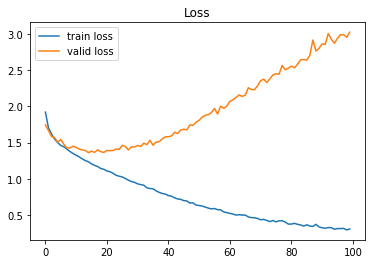

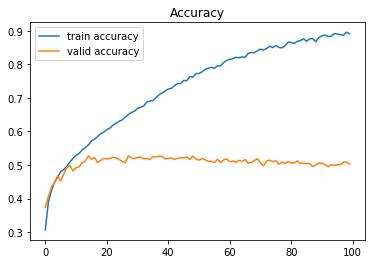

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()